### EX-5 Red Wine Quality Dataset 이용한 와인 품질 예측 모델 구현

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# csv 읽어오기
df = pd.read_csv("winequality-red.csv")
# 품질 책정은 volitile acidity, total sulfur dioxide, density, quality 토대로 진행
df = df[['volatile acidity', 'total sulfur dioxide', 'density', 'quality']]
df.head()

,volatile acidity,total sulfur dioxide,density,quality
0,0.70,34.0,0.9978,5
1,0.88,67.0,0.9968,5
2,0.76,54.0,0.9970,5
3,0.28,60.0,0.9980,6
4,0.70,34.0,0.9978,5


In [4]:
# 특성과 타겟 분리
X = df[['volatile acidity', 'total sulfur dioxide', 'density']]
y = df['quality']

In [5]:
# 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [6]:
# 모델 학습 (선형 회귀)
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
# 예측 값 계산
y_pred = model.predict(X_test)

In [8]:
# 성능 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.2f}")

MSE: 0.50
RMSE: 0.71
R^2: 0.23


C:\Users\ez\AppData\Local\Temp\ipykernel_4324\1957548949.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


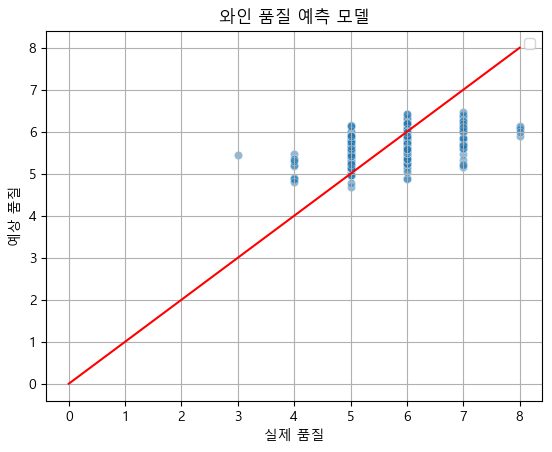

In [11]:
# 시각화
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title("와인 품질 예측 모델")
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([0, max(y_test)], [0, max(y_test)], color = 'red')
plt.xlabel("실제 품질")
plt.ylabel("예상 품질")
plt.legend()
plt.grid(True)
plt.show()